In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas_datareader.data as web
import datetime as dt


In [ ]:
tickers = ['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']
companies = [
    "American Express Co",
    "Amgen Inc",
    "Apple Inc",
    "Boeing Co",
    "Caterpillar Inc",
    "Cisco Systems Inc",
    "Chevron Corp",
    "Goldman Sachs Group Inc",
    "Home Depot Inc",
    "Honeywell International Inc",
    "International Business Machines Corp",
    "Intel Corp",
    "Johnson & Johnson",
    "Coca-Cola Co",
    "JPMorgan Chase & Co",
    "McDonald’s Corp",
    "3M Co",
    "Merck & Co Inc",
    "Microsoft Corp",
    "Nike Inc",
    "Procter & Gamble Co",
    "Travelers Companies Inc",
    "UnitedHealth Group Inc",
    "Salesforce Inc",
    "Verizon Communications Inc",
    "Visa Inc",
    "Walgreens Boots Alliance Inc",
    "Walmart Inc",
    "Walt Disney Co",
    "Dow Inc"
]

start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()

# for i in range(0,29):
#     data.append(web.DataReader(tickers[i], 'stooq'))
#     data[i].to_csv(companies[i] + '.csv')

data = {}

for ticker in tickers:
    try:
        df = web.DataReader(ticker, 'stooq', start, end)
        df = df['Close']
        data[ticker] = df
    except Exception as e:
        print(f"Failed to fetch data for ticker {ticker}: {str(e)}")

# Accessing historical data for a specific ticker (AAPL)
# data['AAPL']


In [ ]:
for entry in data:
    data[entry].to_csv('dow30/' + entry + '.csv')

In [41]:
dow30_comps = pd.DataFrame()

dfs = []

for i in range(0,19):
    comp = pd.read_csv("dow30/"+ str(tickers[i]) + ".csv", delimiter = ",", decimal = ".",
        names = ['Date', str(tickers[i])], header = 0, index_col = "Date", parse_dates=True)

    dow30_comps = pd.merge(dow30_comps, comp, left_index = True, right_index=True, how = "outer")


In [42]:
dow30_comps

,AXP,AMGN,AAPL,BA,CAT,CSCO,CVX,GS,HD,HON,IBM,INTC,JNJ,KO,JPM,MCD,MMM,MRK,MSFT
Date,,,,,,,,,,,,,,,,,,,
2023-07-18,178.0400,232.570,193.7300,211.57,263.8100,51.2400,153.7500,337.270,316.7600,205.2500,135.360,34.5000,159.0600,60.5700,153.6600,293.8200,103.010,105.9500,359.4900
2023-07-17,175.3900,227.840,193.9900,211.87,257.4600,50.8100,153.4400,327.200,316.0500,208.1700,134.240,34.3700,159.0700,60.8100,153.3800,294.6800,101.700,105.5700,345.7300
2023-07-14,173.3900,227.430,190.6900,213.12,255.6200,50.3800,153.5800,326.190,316.5000,206.1400,133.400,33.1500,159.8700,60.9000,149.7700,294.9400,102.300,107.3400,345.2400
2023-07-13,174.2400,227.660,190.5400,216.85,255.8600,51.5300,157.5100,328.680,314.6000,208.7100,133.920,33.8700,158.8100,60.3500,148.8700,295.2200,102.860,106.3200,342.6600
2023-07-12,174.3300,225.680,189.7700,217.11,253.6000,50.7400,159.6400,326.400,317.5200,208.5200,132.840,33.9800,158.0800,59.8400,148.1500,295.6100,101.570,107.4700,337.2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-08,81.4471,126.386,25.1822,115.26,70.4437,21.5520,78.1052,165.029,88.9668,85.4096,111.928,29.1950,85.8151,33.6545,48.6122,76.6430,128.146,48.9265,41.5383
2015-01-07,80.3097,126.807,24.2521,113.27,69.7275,21.3890,76.3623,162.451,87.0610,83.8857,109.567,28.6587,85.1432,33.2523,47.5512,76.3568,125.161,47.9597,40.3490
2015-01-06,78.5938,122.554,23.9130,111.53,68.6632,21.1926,76.4217,160.031,84.1641,83.2828,110.269,28.0687,83.3105,32.8432,47.4804,75.0516,124.252,46.9568,39.8406


In [57]:
# get s&p 500 data
# sp = web.DataReader('SPY.US', 'stooq', start, end)
# sp = sp['Close']
# sp.to_csv('indices/sp500.csv')

sp = pd.read_csv("indices/sp500.csv", delimiter = ",", decimal = ".", index_col='Date', parse_dates=True)

# dow30 = web.DataReader('UDOW.US', 'stooq', start, end)
# dow30 = dow30['Close']
# dow30.to_csv('indices/dow30.csv')

dow30 = pd.read_csv("indices/dow30.csv", delimiter = ",", decimal = ".", index_col='Date', parse_dates=True)

# nasdaq = web.DataReader('^NDQ', 'stooq', start, end)
# nasdaq = nasdaq['Close']
# nasdaq.to_csv('indices/nasdaq.csv')

nasdaq = pd.read_csv("indices/nasdaq.csv", delimiter = ",", decimal = ".", index_col='Date', parse_dates=True)

indices = pd.concat([sp, dow30, nasdaq], join = "outer", axis = 1)
indices.columns = ['S&P 500', 'Dow 30', 'Nasdaq']





,S&P 500,Dow 30,Nasdaq
Date,,,
2023-07-18,454.190,62.2900,14353.64
2023-07-17,450.840,60.3400,14244.95
2023-07-14,449.280,60.0300,14113.70
2023-07-13,449.560,59.4300,14138.57
2023-07-12,446.020,59.3300,13918.96
...,...,...,...
2015-01-08,178.687,17.2768,4736.19
2015-01-07,175.544,16.3844,4650.47
2015-01-06,173.412,15.7756,4592.74


In [65]:
indices = indices[::-1]

In [66]:
indices_rets = indices.pct_change()
indices_cumrets = indices_rets.add(1).cumprod().sub(1)*100

fig = px.line(indices_cumrets, x=indices_cumrets.index, y=indices_cumrets.columns, title='Cumulative Returns of Indices (2015-2023)')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')
fig.show()

In [69]:
# dow30_comps = dow30_comps[::-1]
dow30_comps

,AXP,AMGN,AAPL,BA,CAT,CSCO,CVX,GS,HD,HON,IBM,INTC,JNJ,KO,JPM,MCD,MMM,MRK,MSFT
Date,,,,,,,,,,,,,,,,,,,
2015-01-02,82.4862,128.146,24.6030,113.64,72.9602,21.6306,79.6307,168.606,86.2397,85.0994,114.544,28.9303,84.3088,32.5946,50.3059,75.7509,128.485,44.5210,40.8126
2015-01-05,80.3047,126.631,23.9110,112.87,69.1070,21.2005,76.4608,163.344,84.4242,83.4778,112.709,28.6040,83.7106,32.5946,48.7429,74.9090,125.617,45.1809,40.4353
2015-01-06,78.5938,122.554,23.9130,111.53,68.6632,21.1926,76.4217,160.031,84.1641,83.2828,110.269,28.0687,83.3105,32.8432,47.4804,75.0516,124.252,46.9568,39.8406
2015-01-07,80.3097,126.807,24.2521,113.27,69.7275,21.3890,76.3623,162.451,87.0610,83.8857,109.567,28.6587,85.1432,33.2523,47.5512,76.3568,125.161,47.9597,40.3490
2015-01-08,81.4471,126.386,25.1822,115.26,70.4437,21.5520,78.1052,165.029,88.9668,85.4096,111.928,29.1950,85.8151,33.6545,48.6122,76.6430,128.146,48.9265,41.5383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-12,174.3300,225.680,189.7700,217.11,253.6000,50.7400,159.6400,326.400,317.5200,208.5200,132.840,33.9800,158.0800,59.8400,148.1500,295.6100,101.570,107.4700,337.2000
2023-07-13,174.2400,227.660,190.5400,216.85,255.8600,51.5300,157.5100,328.680,314.6000,208.7100,133.920,33.8700,158.8100,60.3500,148.8700,295.2200,102.860,106.3200,342.6600
2023-07-14,173.3900,227.430,190.6900,213.12,255.6200,50.3800,153.5800,326.190,316.5000,206.1400,133.400,33.1500,159.8700,60.9000,149.7700,294.9400,102.300,107.3400,345.2400


In [68]:
dow30_comps_returns = dow30_comps.pct_change()
dow30_comps_rets_cumprod = dow30_comps_returns.add(1).cumprod().sub(1)*100

fig = px.line(dow30_comps_rets_cumprod, x=dow30_comps_rets_cumprod.index, y=dow30_comps_rets_cumprod.columns, title='Cumulative Returns of DOW30 Stocks (2015-2023)')

fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()

In [71]:
corr_matrix = dow30_comps_returns.corr()
correlation = px.imshow(corr_matrix)
correlation.show()

In [72]:
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.expected_returns import ema_historical_return
from pypfopt.risk_models import exp_cov
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.plotting import plot_efficient_frontier
from pypfopt.plotting import plot_weights
from pypfopt.cla import CLA

In [84]:
# split into train and test data

train = dow30_comps_returns[:"2021-10-21"]
test = dow30_comps_returns["2021-10-21":]

# calculate expected returns and sample covariance
mu = ema_historical_return(train, returns_data=True, span=500)
Sigma = risk_models.exp_cov(train, returns_data=True, span=180)

In [117]:
ret_ef = np.arange(0, 0.55, 0.01)
vol_ef = []

# This code is looping through a list of target returns (ret_ef) and using the EfficientFrontier class to create 
# an efficient portfolio for each target return. The EfficientFrontier class takes two parameters, mu and S,
# which represent the expected returns and covariance matrix of the assets in the portfolio respectively. 
# The efficient_return() method is then used to generate an efficient portfolio with the given target return and market 
# neutrality set to True. Finally, the portfolio performance is appended to the vol_ef list, which contains the 
# volatility of each efficient portfolio.

for i in np.arange(0, 0.55, 0.01):
    ef = EfficientFrontier(mu, Sigma)
    ef.efficient_return(i)
    vol_ef.append(ef.portfolio_performance()[1])

# now we create an efficient frontier class to find the minimum volatility portfolio and the maximum sharpe ratio portfolio

ef = EfficientFrontier(mu, Sigma)

ef.min_volatility()
min_vol_ret = ef.portfolio_performance()[0]
min_vol_vol = ef.portfolio_performance()[1]
min_vol_sharpe = ef.portfolio_performance()[2]

ef = EfficientFrontier(mu, Sigma)

ef.max_sharpe(risk_free_rate=0.04)
max_sharpe_ret = ef.portfolio_performance(risk_free_rate=0.04)[0]
max_sharpe_vol = ef.portfolio_performance(risk_free_rate=0.04)[1]
max_share_sharpe = ef.portfolio_performance(risk_free_rate=0.04)[2]



In [118]:
len(vol_ef)

55

Text(0.5, 1.0, 'Efficient Frontier')

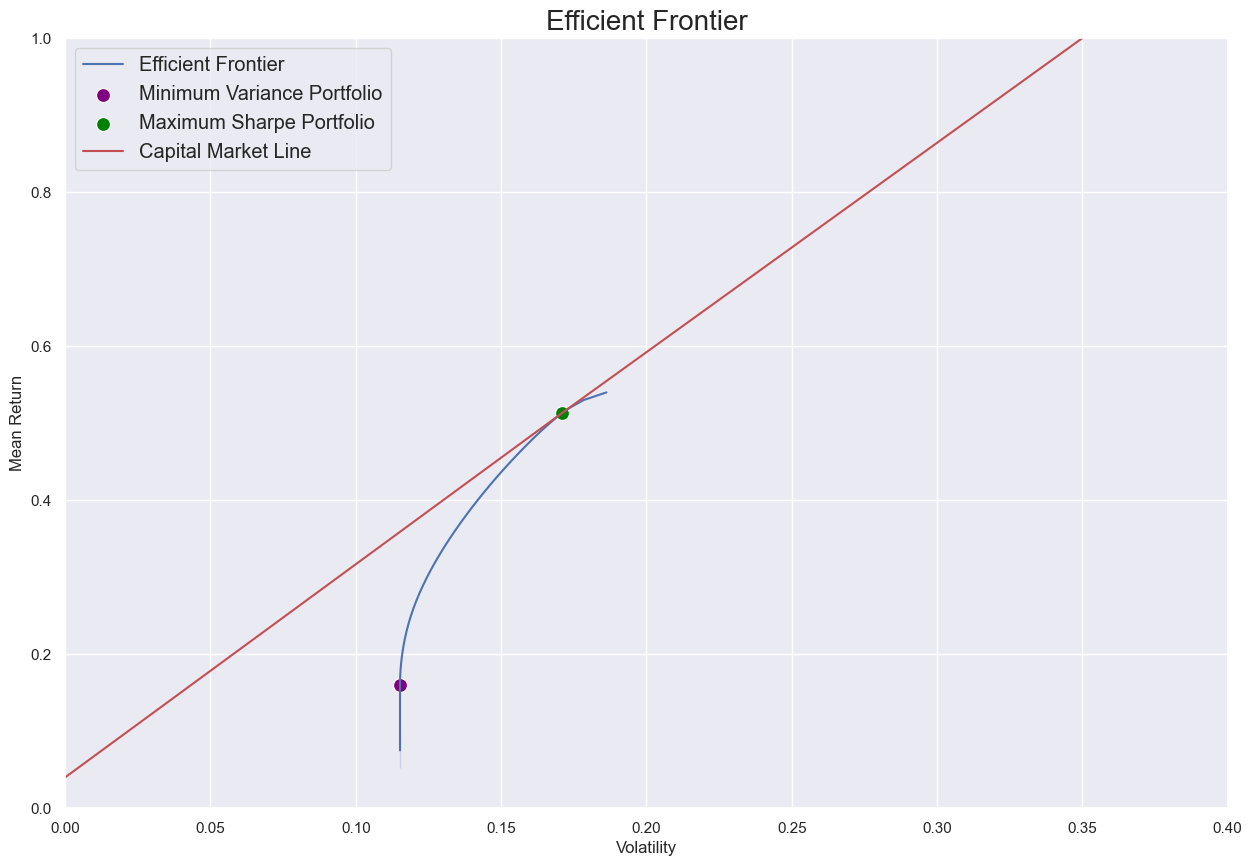

In [120]:
sns.set()

fig, ax = plt.subplots(figsize = [15,10])

sns.lineplot(x = vol_ef, y = ret_ef, label = "Efficient Frontier", ax = ax)
sns.scatterplot(x = [min_vol_vol], y = [min_vol_ret], ax = ax, label = "Minimum Variance Portfolio", color = "purple", s = 100)
sns.scatterplot(x = [max_sharpe_vol], y = [max_sharpe_ret], ax = ax, label = "Maximum Sharpe Portfolio", color = "green", s = 100)
sns.lineplot(x = [0, max_sharpe_vol, 1], y = [0.04, max_sharpe_ret, 2.7676], label = "Capital Market Line", ax = ax, color = "r")

ax.set(xlim = [0, 0.4])
ax.set(ylim = [0, 1])
ax.set_xlabel("Volatility")
ax.set_ylabel("Mean Return")
plt.legend(fontsize='large')
plt.title("Efficient Frontier", fontsize = '20')

In [105]:
print(max_sharpe_vol)
print(max_sharpe_ret)

# find the gradient between the point (0, 0.04) and (max_sharpe_vol, max_sharpe_ret)

m = (max_sharpe_ret - 0.04)/(max_sharpe_vol - 0)
m

0.17110683455201148
0.5135558956097803


2.7676036252417093

Expected annual return: 16.0%
Annual volatility: 11.5%
Sharpe Ratio: 1.04


(0.1596171808982635, 0.1152277431867138, 1.0380935839768821)

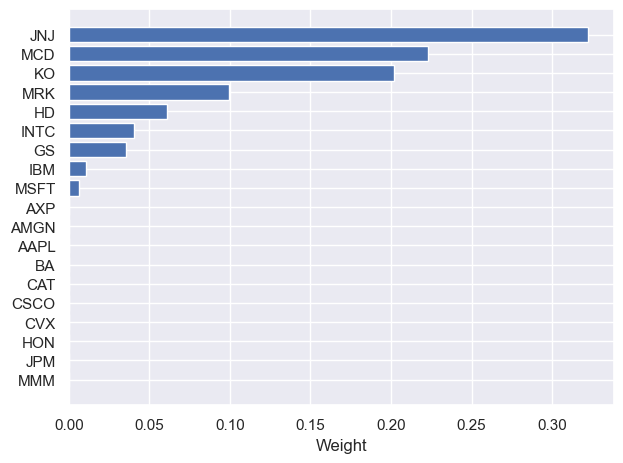

In [121]:
ef = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp = ef.min_volatility()

plot_weights(raw_weights_minvar_exp)
ef.portfolio_performance(verbose = True, risk_free_rate = 0.04)

Expected annual return: 51.4%
Annual volatility: 17.1%
Sharpe Ratio: 2.77


(0.5135558956097803, 0.17110683455201148, 2.7676036252417093)

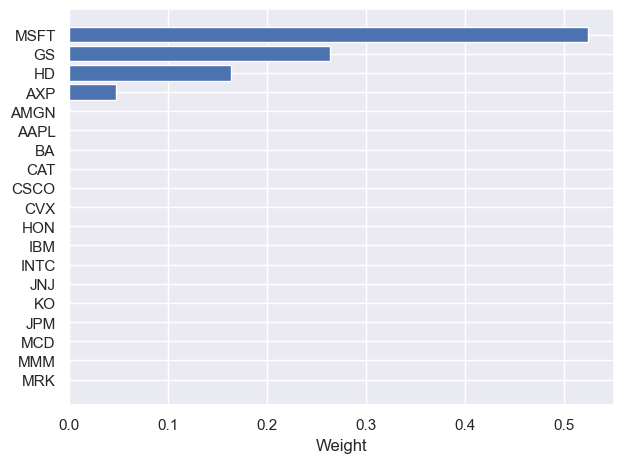

In [122]:
ef = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef.max_sharpe(risk_free_rate = 0.04)
plot_weights(raw_weights_maxsharpe_exp)
ef.portfolio_performance(verbose = True, risk_free_rate = 0.04)

In [132]:
weights_minvar_exp = list(raw_weights_minvar_exp.values())
weights_maxsharpe_exp = list(raw_weights_maxsharpe_exp.values())

ret_1 = test.dot(weights_minvar_exp).add(1).cumprod().subtract(1).multiply(100)
ret_2 = test.dot(weights_maxsharpe_exp).add(1).cumprod().subtract(1).multiply(100)

ind_ret = indices["2021-10-21":]['Dow 30'].pct_change().add(1).cumprod().subtract(1).multiply(100)

In [133]:
back = pd.DataFrame({"MinVar": ret_1, "MaxSharpe": ret_2})
back = pd.concat([back, ind_ret], join = 'outer', axis = 1)

back.drop(back.tail(1).index,inplace=True)
back.interpolate(method = "linear", inplace = True)

fig = px.line(back, x=back.index, y=back.columns, title='Backtest of Efficient Portfolios (2021-2023)')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()